<a href="https://colab.research.google.com/github/AFBA1993/DeepLearningTutorials/blob/main/RNNLSTM/petr4_recorrente_um_valor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
base = pd.read_csv('/content/drive/MyDrive/UdemyDeepCSVs/petr4_treinamento.csv')
base = base.dropna()
base_treinamento = base.iloc[:, 1:2].values

In [3]:
normalizador = MinMaxScaler(feature_range = (0,1))
base_treinamento_norm = normalizador.fit_transform(base_treinamento)

In [4]:
previsores = []
preco_real = []

In [5]:
for i in range(90, 1242):
  previsores.append(base_treinamento_norm[i-90:i,0])
  preco_real.append(base_treinamento_norm[i, 0])

In [6]:
previsores, preco_real = np.array(previsores), np.array(preco_real)

In [7]:
previsores = np.reshape(previsores, (previsores.shape[0],
                                     previsores.shape[1], 1))

In [8]:
regressor = Sequential()
regressor.add(LSTM(units = 100, return_sequences = True, 
                   input_shape = (previsores.shape[1], 1)))
regressor.add(Dropout(0.3))

In [9]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))

In [10]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))

In [11]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.3))

In [12]:
regressor.add(Dense(units = 1, activation = 'linear'))

In [13]:
regressor.compile(optimizer = 'rmsprop', loss = 'mse',
                  metrics = ['mae'])

In [14]:
regressor.fit(previsores, preco_real, epochs = 100,
              batch_size = 32)

Epoch 1/100
36/36 [==============================] - 14s 191ms/step - loss: 0.0358 - mae: 0.1325
Epoch 2/100
36/36 [==============================] - 7s 187ms/step - loss: 0.0170 - mae: 0.1029
Epoch 3/100
36/36 [==============================] - 7s 185ms/step - loss: 0.0128 - mae: 0.0871
Epoch 4/100
36/36 [==============================] - 7s 193ms/step - loss: 0.0123 - mae: 0.0852
Epoch 5/100
36/36 [==============================] - 7s 186ms/step - loss: 0.0100 - mae: 0.0773
Epoch 6/100
36/36 [==============================] - 7s 186ms/step - loss: 0.0084 - mae: 0.0720
Epoch 7/100
36/36 [==============================] - 7s 185ms/step - loss: 0.0089 - mae: 0.0728
Epoch 8/100
36/36 [==============================] - 7s 187ms/step - loss: 0.0079 - mae: 0.0686
Epoch 9/100
36/36 [==============================] - 7s 188ms/step - loss: 0.0082 - mae: 0.0682
Epoch 10/100
36/36 [==============================] - 7s 193ms/step - loss: 0.0065 - mae: 0.0615
Epoch 11/100
36/36 [==================

In [15]:
base_teste =  pd.read_csv('/content/drive/MyDrive/UdemyDeepCSVs/petr4_teste.csv')

In [16]:
base_completa = pd.concat((base['Open'],base_teste['Open']), axis = 0)

In [17]:
entradas = base_completa[len(base_completa)-len(base_teste)-90:].values

In [18]:
entradas = entradas.reshape(-1, 1)

In [19]:
entradas = normalizador.transform(entradas)

In [20]:
X_teste = []
for i in range(90,112):
  X_teste.append(entradas[i-90:i,0])
X_teste = np.array(X_teste)
X_teste = np.reshape(X_teste, (X_teste.shape[0], X_teste.shape[1],1))

In [21]:
previsoes = regressor.predict(X_teste)

In [22]:
previsoes = normalizador.inverse_transform(previsoes)

In [23]:
previsoes.mean()

18.096636

In [24]:
preco_real_teste = base_teste.iloc[:, 1:2].values

In [25]:
preco_real_teste.mean()

17.87454563636364

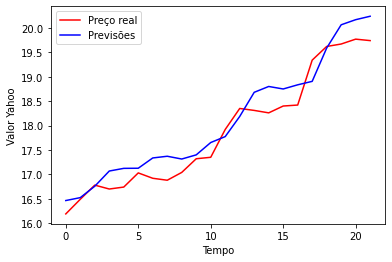

In [31]:
plt.plot(preco_real_teste, color = 'red', label = 'Preço real')
plt.plot(previsoes, color = 'blue', label = 'Previsões')
plt.xlabel('Tempo')
plt.ylabel('Valor Yahoo')
plt.legend()
plt.show()